In [8]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [9]:
!kaggle datasets download -d salader/dogs-vs-cats

 98% 1.04G/1.06G [00:06<00:00, 154MB/s]
100% 1.06G/1.06G [00:06<00:00, 166MB/s]


In [10]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [11]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten

In [12]:
# Generators: they divide all data in batches and only one batch load in ram
train_ds = tf.keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels="inferred",
    label_mode="int", #cat=0 and dog =1
    batch_size=32,
    image_size=(256, 256),
)

validation_ds = tf.keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels="inferred",
    label_mode="int", #cat=0 and dog =1
    batch_size=32,
    image_size=(256, 256),
)


Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [13]:
# Normalization
def process (image, label):
  image = tf.cast(image/255. , tf.float32)
  return image, label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [14]:
# Creat CNN model
model = Sequential()
# Layer1
model.add(Conv2D(32, kernel_size=(3,3), padding ='valid', activation='relu', input_shape =(256,256,3)))
model.add(MaxPooling2D(pool_size=(2,2), strides =2, padding='valid'))

# Layer2
model.add(Conv2D(64, kernel_size=(3,3), padding ='valid', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides =2, padding='valid'))
# Layer3
model.add(Conv2D(128, kernel_size=(3,3), padding ='valid', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides =2, padding='valid'))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid')) #Output layer

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 128)       0

In [16]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [17]:
history = model.fit(train_ds, epochs=10, validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 70s 87ms/step - loss: 0.6259 - accuracy: 0.6416 - val_loss: 0.5561 - val_accuracy: 0.7080
Epoch 2/10
625/625 [==============================] - 55s 87ms/step - loss: 0.4859 - accuracy: 0.7603 - val_loss: 0.5582 - val_accuracy: 0.7496
Epoch 3/10
625/625 [==============================] - 59s 94ms/step - loss: 0.3784 - accuracy: 0.8270 - val_loss: 0.4834 - val_accuracy: 0.7972
Epoch 4/10
625/625 [==============================] - 55s 88ms/step - loss: 0.2518 - accuracy: 0.8921 - val_loss: 0.6711 - val_accuracy: 0.7864
Epoch 5/10
625/625 [==============================] - 53s 85ms/step - loss: 0.1423 - accuracy: 0.9431 - val_loss: 0.9494 - val_accuracy: 0.7668
Epoch 6/10
625/625 [==============================] - 55s 88ms/step - loss: 0.0905 - accuracy: 0.9665 - val_loss: 1.0119 - val_accuracy: 0.7818
Epoch 7/10
625/625 [==============================] - 55s 87ms/step - loss: 0.0552 - accuracy: 0.9804 - val_loss: 1.2291 - val_accuracy:

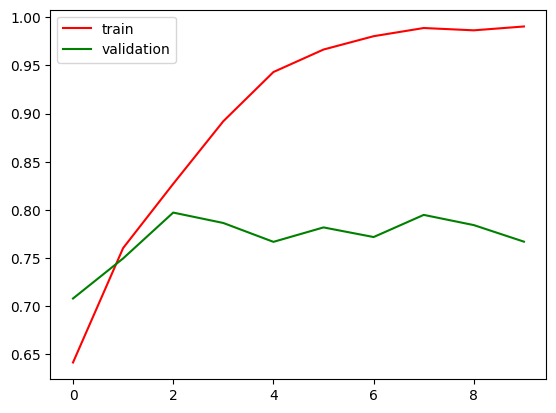

In [18]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], color='red', label='train')
plt.plot(history.history['val_accuracy'], color='green', label='validation')
plt.legend()
plt.show()

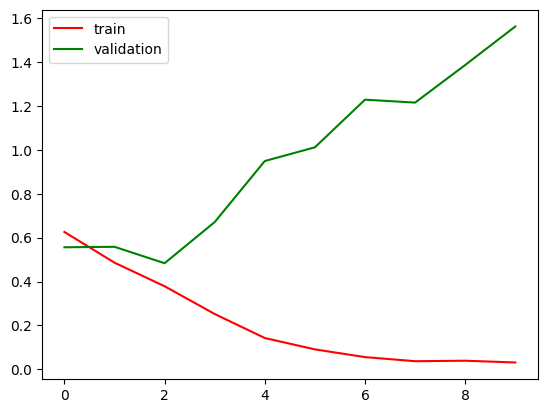

In [19]:
plt.plot(history.history['loss'], color='red', label='train')
plt.plot(history.history['val_loss'], color='green', label='validation')
plt.legend()
plt.show()
# its a clear indication of overfitting

In [20]:
# ways to reduce overfitting
# add more data
# Data augmentation
# L1/L2 regularization
# Dropout
# Batch Norm
# Recue compexity

In [21]:
# here we will try dropout and batch normalization
from keras.layers import BatchNormalization, Dropout

In [25]:
# Layer1
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), padding ='valid', activation='relu', input_shape =(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides =2, padding='valid'))

# Layer2
model.add(Conv2D(64, kernel_size=(3,3), padding ='valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides =2, padding='valid'))
# Layer3
model.add(Conv2D(128, kernel_size=(3,3), padding ='valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides =2, padding='valid'))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1, activation='sigmoid')) #Output layer

In [27]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [28]:
history = model.fit(train_ds, epochs=10, validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 70s 106ms/step - loss: 1.1850 - accuracy: 0.5947 - val_loss: 0.6172 - val_accuracy: 0.6938
Epoch 2/10
625/625 [==============================] - 81s 130ms/step - loss: 0.5709 - accuracy: 0.7068 - val_loss: 0.5902 - val_accuracy: 0.7198
Epoch 3/10
625/625 [==============================] - 66s 105ms/step - loss: 0.4884 - accuracy: 0.7674 - val_loss: 0.5707 - val_accuracy: 0.6832
Epoch 4/10
625/625 [==============================] - 66s 105ms/step - loss: 0.4379 - accuracy: 0.7980 - val_loss: 0.8515 - val_accuracy: 0.6370
Epoch 5/10
625/625 [==============================] - 68s 108ms/step - loss: 0.3674 - accuracy: 0.8396 - val_loss: 0.6892 - val_accuracy: 0.6916
Epoch 6/10
625/625 [==============================] - 67s 107ms/step - loss: 0.2814 - accuracy: 0.8779 - val_loss: 0.8935 - val_accuracy: 0.6842
Epoch 7/10
625/625 [==============================] - 67s 107ms/step - loss: 0.2015 - accuracy: 0.9176 - val_loss: 0.5567 - val_ac

In [29]:
import cv2

In [30]:
test_img = cv2.imread('/content/cat.jpeg')

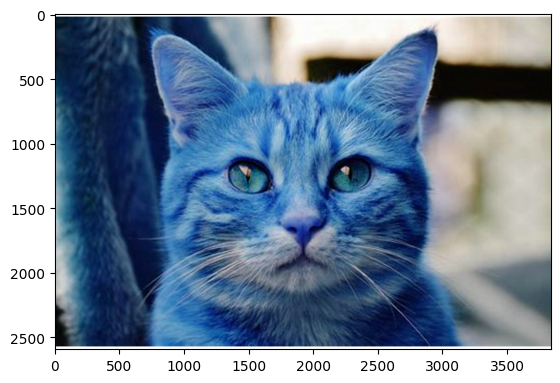

In [31]:
plt.imshow(test_img)

In [32]:
test_img.shape

(2592, 3840, 3)

In [34]:
# resizing image
test_img = cv2.resize(test_img,(256,256))

In [35]:
test_input = test_img.reshape((1,256,256,3)) #1 image of shape 256*256 and send in 3 batch

In [36]:
model.predict(test_input)

1/1 [==============================] - 0s 261ms/step


array([[0.]], dtype=float32)